# Tensorflow2教程-rnn变体

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

## 1.导入数据

In [ ]:
num_words = 30000
maxlen = 200

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.imdb.load_data(num_words=num_words)
print(x_train.shape, ' ', y_train.shape)
print(x_test.shape, ' ', y_test.shape)


In [ ]:
x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen, padding='post')
x_test = keras.preprocessing.sequence.pad_sequences(x_test, maxlen, padding='post')

In [ ]:

print(x_train.shape, ' ', y_train.shape)
print(x_test.shape, ' ', y_test.shape)


## 1.LSTM

In [9]:
def lstm_model():
    model = keras.Sequential([
        layers.Embedding(input_dim=30000, output_dim=32, input_length=maxlen),
        layers.LSTM(32, return_sequences=True),
        layers.LSTM(1, activation='sigmoid', return_sequences=False)
    ])
    model.compile(optimizer=keras.optimizers.Adam(),
                 loss=keras.losses.BinaryCrossentropy(),
                 metrics=['accuracy'])
    return model
model = lstm_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 200, 32)           960000    
_________________________________________________________________
unified_lstm_4 (UnifiedLSTM) (None, 200, 32)           8320      
_________________________________________________________________
unified_lstm_5 (UnifiedLSTM) (None, 1)                 136       
Total params: 968,456
Trainable params: 968,456
Non-trainable params: 0
_________________________________________________________________


In [11]:
%%time
history = model.fit(x_train, y_train, batch_size=64, epochs=5,validation_split=0.1)

Train on 22500 samples, validate on 2500 samples
Epoch 1/5
22500/22500 [==============================] - 100s 4ms/sample - loss: 0.6589 - accuracy: 0.6056 - val_loss: 0.6090 - val_accuracy: 0.6544
Epoch 2/5
22500/22500 [==============================] - 100s 4ms/sample - loss: 0.6418 - accuracy: 0.6076 - val_loss: 0.6356 - val_accuracy: 0.6068
Epoch 3/5
22500/22500 [==============================] - 100s 4ms/sample - loss: 0.5763 - accuracy: 0.6980 - val_loss: 0.5984 - val_accuracy: 0.6724
Epoch 4/5
22500/22500 [==============================] - 102s 5ms/sample - loss: 0.5749 - accuracy: 0.7150 - val_loss: 0.5044 - val_accuracy: 0.7900
Epoch 5/5
22500/22500 [==============================] - 102s 5ms/sample - loss: 0.4893 - accuracy: 0.7993 - val_loss: 0.7230 - val_accuracy: 0.6756
CPU times: user 14min 29s, sys: 42.5 s, total: 15min 12s
Wall time: 8min 24s


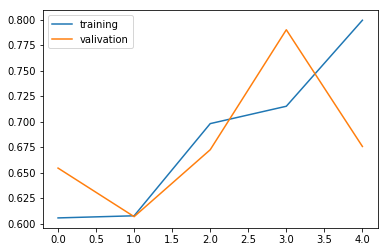

In [14]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'valivation'], loc='upper left')
plt.show()

## 3.GRU

In [15]:
def lstm_model():
    model = keras.Sequential([
        layers.Embedding(input_dim=30000, output_dim=32, input_length=maxlen),
        layers.GRU(32, return_sequences=True),
        layers.GRU(1, activation='sigmoid', return_sequences=False)
    ])
    model.compile(optimizer=keras.optimizers.Adam(),
                 loss=keras.losses.BinaryCrossentropy(),
                 metrics=['accuracy'])
    return model
model = lstm_model()
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 200, 32)           960000    
_________________________________________________________________
unified_gru (UnifiedGRU)     (None, 200, 32)           6336      
_________________________________________________________________
unified_gru_1 (UnifiedGRU)   (None, 1)                 105       
Total params: 966,441
Trainable params: 966,441
Non-trainable params: 0
_________________________________________________________________


In [16]:
%%time
history = model.fit(x_train, y_train, batch_size=64, epochs=5,validation_split=0.1)

Train on 22500 samples, validate on 2500 samples
Epoch 1/5
22500/22500 [==============================] - 94s 4ms/sample - loss: 0.6498 - accuracy: 0.5847 - val_loss: 0.4840 - val_accuracy: 0.7664
Epoch 2/5
22500/22500 [==============================] - 98s 4ms/sample - loss: 0.4172 - accuracy: 0.8255 - val_loss: 0.4279 - val_accuracy: 0.8300
Epoch 3/5
22500/22500 [==============================] - 101s 5ms/sample - loss: 0.3179 - accuracy: 0.8825 - val_loss: 0.3918 - val_accuracy: 0.8472
Epoch 4/5
22500/22500 [==============================] - 99s 4ms/sample - loss: 0.3306 - accuracy: 0.8870 - val_loss: 0.3959 - val_accuracy: 0.8468
Epoch 5/5
22500/22500 [==============================] - 96s 4ms/sample - loss: 0.2607 - accuracy: 0.9120 - val_loss: 0.3849 - val_accuracy: 0.8532
CPU times: user 14min 25s, sys: 38.9 s, total: 15min 4s
Wall time: 8min 10s


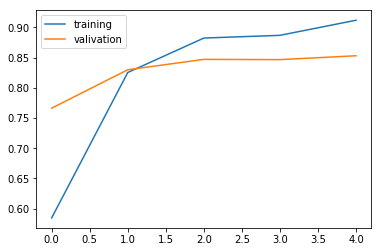

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'valivation'], loc='upper left')
plt.show()

## 4.CuDNN LSTM

In [20]:
def lstm_model():
    model = keras.Sequential([
        layers.Embedding(input_dim=30000, output_dim=32, input_length=maxlen),
        layers.CuDNNLSTM(32, return_sequences=True),
        layers.CuDNNLSTM(1, activation='sigmoid', return_sequences=False)
    ])
    model.compile(optimizer=keras.optimizers.Adam(),
                 loss=keras.losses.BinaryCrossentropy(),
                 metrics=['accuracy'])
    return model
model = lstm_model()
model.summary()
# tf2版没有

AttributeError: module 'tensorflow.python.keras.api._v2.keras.layers' has no attribute 'CuDNNLSTM'

In [ ]:
%%time
history = model.fit(x_train, y_train, batch_size=64, epochs=5,validation_split=0.1)

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'valivation'], loc='upper left')
plt.show()

## 5.CuDNN GRU

In [ ]:
def lstm_model():
    model = keras.Sequential([
        layers.Embedding(input_dim=30000, output_dim=32, input_length=maxlen),
        layers.CuDNNGRU(32, return_sequences=True),
        layers.CuDNNGRU(1, activation='sigmoid', return_sequences=False)
    ])
    model.compile(optimizer=keras.optimizers.Adam(),
                 loss=keras.losses.BinaryCrossentropy(),
                 metrics=['accuracy'])
    return model
model = lstm_model()
model.summary()

In [ ]:
%%time
history = model.fit(x_train, y_train, batch_size=64, epochs=5,validation_split=0.1)

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'valivation'], loc='upper left')
plt.show()

In [ ]:
layers.